# Ödev 2: K-Means ve California Housing Dataset

Bu ödevde California housing veri setini, Kmeans algoritmasını kullanarak ekonomik segmentlere ayırmanız gerekmektedir. Alt görevler:

1. Verisetini kullanarak farklı cluster sayılarında KMeans clusterları eğit (2-8 arası iyi bir seçim)
2. Her bir KMeans için silhouette skorunu çıkar ve görselleştir. Eğer istersen Silhouette grafiğini de çıkarabilirsin.
3. Farklı cluster sayılarının, segmentasyona etkilerini incele. Örneğin cluster sayısı 2 olduğunda haritayı 2'ye bölüp yukarıdakiler ve aşağıdakiler şeklinde ayırıyor, 3 olduğunda ise yukarıdakiler, aşağıdakiler ve zenginler gibi ayırıyor. Bol bol keşfet!

In [3]:
from sklearn.datasets import fetch_california_housing

dataset  = fetch_california_housing(as_frame = True)

In [4]:
X = dataset.data
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


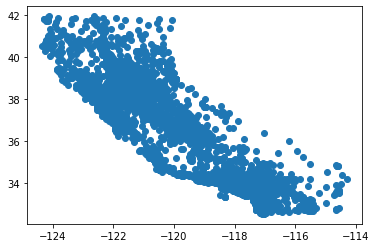

In [5]:
import matplotlib.pyplot as plt

plt.scatter(X['Longitude'],X['Latitude'])

In [6]:
X = X.loc[:, ["MedInc", "Latitude", "Longitude"]]

In [7]:
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


## Kolay gelsin!

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np
from matplotlib import cm

In [10]:
silhouette_scores, inertia_scores = [], []
n_clusters = range(2, 10)

for k in n_clusters:
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X)
    
    silhouette_scores.append(silhouette_score(X, labels))
    inertia_scores.append(kmeans.inertia_)

In [11]:
silhouette_scores

[0.5665094919763822,
 0.5030189605750357,
 0.42458289404761923,
 0.3750002543429985,
 0.39907530199385305,
 0.3631930265598109,
 0.34230464827841445,
 0.3491317086769819]

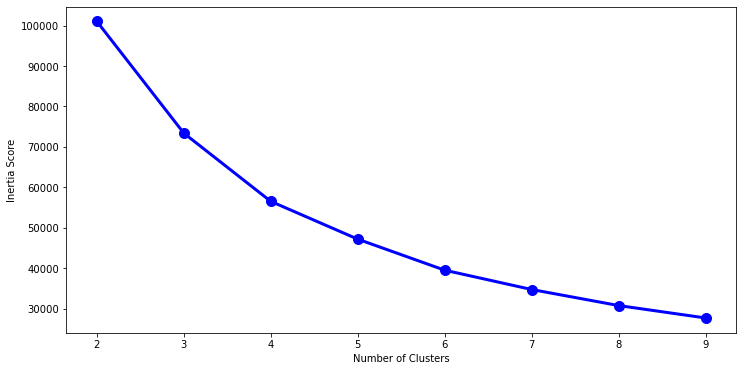

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(n_clusters, inertia_scores, 'bo-', linewidth=3, markersize=10)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Score')
plt.show()

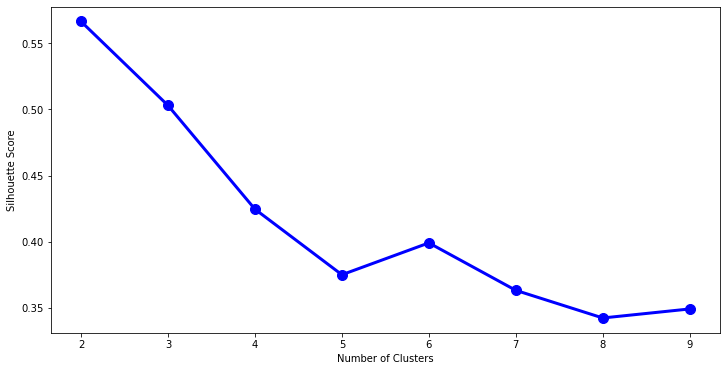

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(n_clusters, silhouette_scores, 'bo-', linewidth=3, markersize=10)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Text(0.5, 1.0, 'k=10')

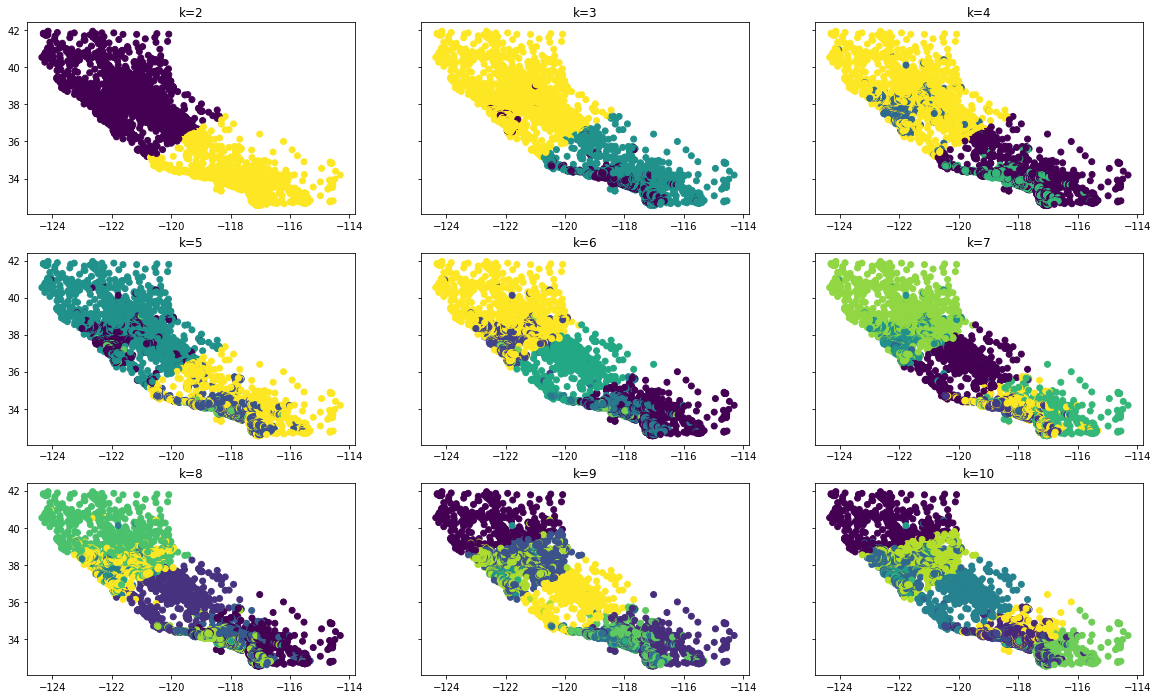

In [16]:
fig, ax = plt.subplots(3, 3, figsize=(20, 12), sharey=True)

labels = KMeans(2, random_state=0).fit_predict(X)
ax[0][0].scatter(X["Longitude"], X["Latitude"], c=labels)
ax[0][0].set_title("k=2")

labels = KMeans(3, random_state=0).fit_predict(X)
ax[0][1].scatter(X["Longitude"], X["Latitude"], c=labels)
ax[0][1].set_title("k=3")

labels = KMeans(4, random_state=0).fit_predict(X)
ax[0][2].scatter(X["Longitude"], X["Latitude"], c=labels)
ax[0][2].set_title("k=4")

labels = KMeans(5, random_state=0).fit_predict(X)
ax[1][0].scatter(X["Longitude"], X["Latitude"], c=labels)
ax[1][0].set_title("k=5")

labels = KMeans(6, random_state=0).fit_predict(X)
ax[1][1].scatter(X["Longitude"], X["Latitude"], c=labels)
ax[1][1].set_title("k=6")

labels = KMeans(7, random_state=0).fit_predict(X)
ax[1][2].scatter(X["Longitude"], X["Latitude"], c=labels)
ax[1][2].set_title("k=7")

labels = KMeans(8, random_state=0).fit_predict(X)
ax[2][0].scatter(X["Longitude"], X["Latitude"], c=labels)
ax[2][0].set_title("k=8")

labels = KMeans(9, random_state=0).fit_predict(X)
ax[2][1].scatter(X["Longitude"], X["Latitude"], c=labels)
ax[2][1].set_title("k=9")

labels = KMeans(10, random_state=0).fit_predict(X)
ax[2][2].scatter(X["Longitude"], X["Latitude"], c=labels)
ax[2][2].set_title("k=10")

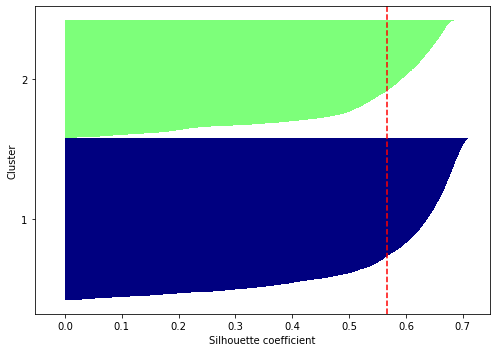

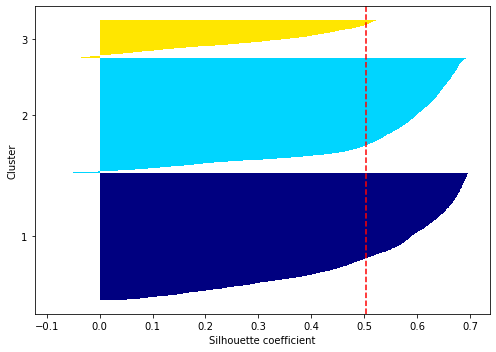

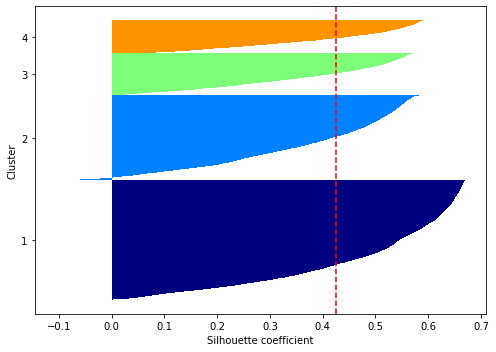

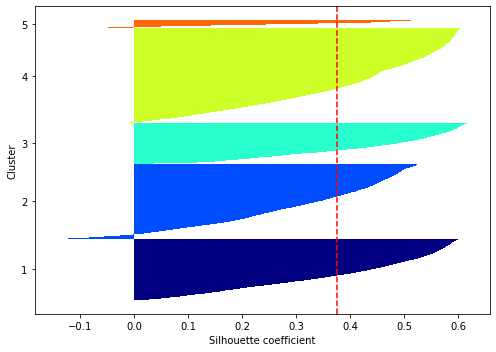

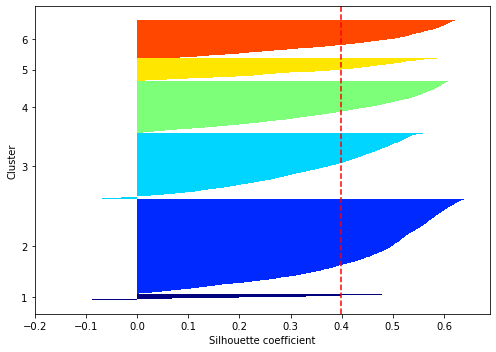

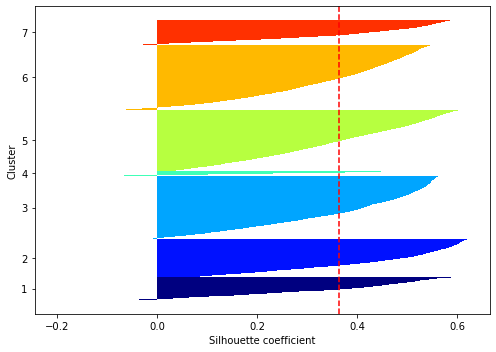

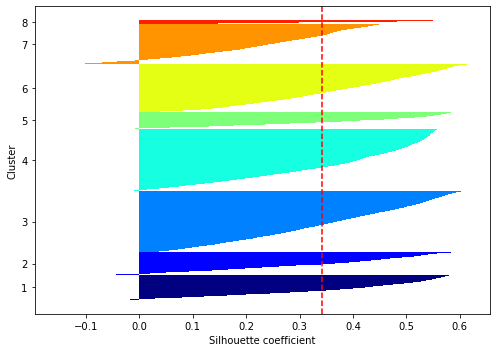

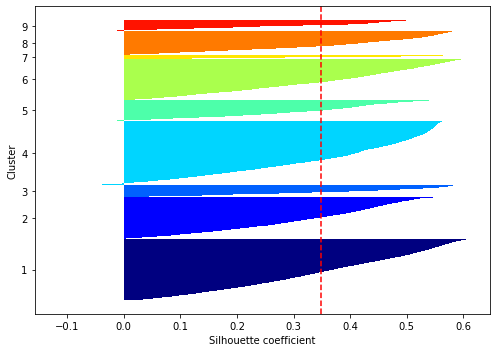

In [15]:
for k in n_clusters:
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X)    
    
    cluster_labels = np.unique(labels)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, labels, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    plt.figure(figsize=(7, 5))
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
                 edgecolor='none', color=color)

        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--") 

    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')

    plt.tight_layout()
    plt.show()